In [3]:
import numpy as np

import pandas as pd
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

trainFile = pd.read_csv(r"C:\Users\bisha\OneDrive\Desktop\hrv dataset\data\final\train.csv").drop(columns="datasetId")
testFile = pd.read_csv(r"C:\Users\bisha\OneDrive\Desktop\hrv dataset\data\final\test.csv").drop(columns="datasetId")
#features
X_train = trainFile.drop(columns='condition')
y_train = trainFile['condition']
X_test = testFile.drop(columns='condition')
y_test = testFile['condition']

In [42]:
X_test.shape

(41033, 34)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.99


In [12]:
print(X_test.shape)


(41033, 34)


In [24]:
predictedValues = []
for i in range(0,41033): 
    predicted = knn.predict([X_test.iloc[i]])
    predictedValues.append(predicted)
    #print(predicted)
   # print(X_test.iloc[i])

In [25]:
pd.DataFrame(predictedValues)

,0
0,no stress
1,time pressure
2,no stress
3,no stress
4,interruption
...,...
41028,time pressure
41029,interruption
41030,no stress
41031,no stress


In [34]:
t = pd.DataFrame(y_test)

In [38]:
t.value_counts()

condition    
no stress        22158
interruption     11782
time pressure     7093
dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,predictedValues)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[11733    44     5]
 [   46 22074    38]
 [    8    69  7016]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

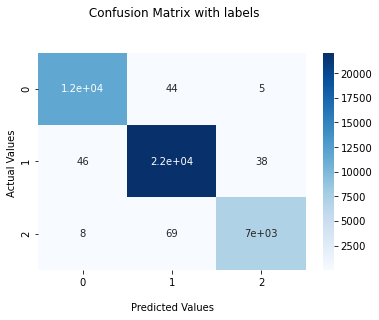

In [28]:

import seaborn as sns

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

<AxesSubplot:>

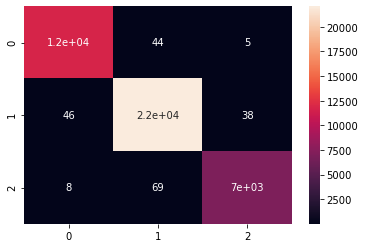

In [29]:
import seaborn as sns
sns.heatmap(confusion, annot=True)